In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("data/jobs_salaries_2023.csv")

# Basic info
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           1500 non-null   int64  
 1   experience_level    1500 non-null   object 
 2   employment_type     1500 non-null   object 
 3   job_title           1500 non-null   object 
 4   salary              1494 non-null   float64
 5   salary_currency     1500 non-null   object 
 6   salary_in_usd       1494 non-null   float64
 7   employee_residence  1500 non-null   object 
 8   remote_ratio        1500 non-null   int64  
 9   company_location    1500 non-null   object 
 10  company_size        1500 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 129.0+ KB


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000.0,EUR,85847.0,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000.0,USD,30000.0,US,100,US,S
2,2023,MI,CT,ML Engineer,25500.0,USD,25500.0,US,100,US,S
3,2023,SE,FT,Data Scientist,175000.0,USD,175000.0,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000.0,USD,120000.0,CA,100,CA,M


In [14]:
# Remove duplicates
df = df.drop_duplicates()

# Check missing values
print(df.isna().sum())

# Drop rows with missing salary_in_usd (or handle as needed)
df = df.dropna(subset=["salary_in_usd"])

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                6
salary_currency       0
salary_in_usd         6
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


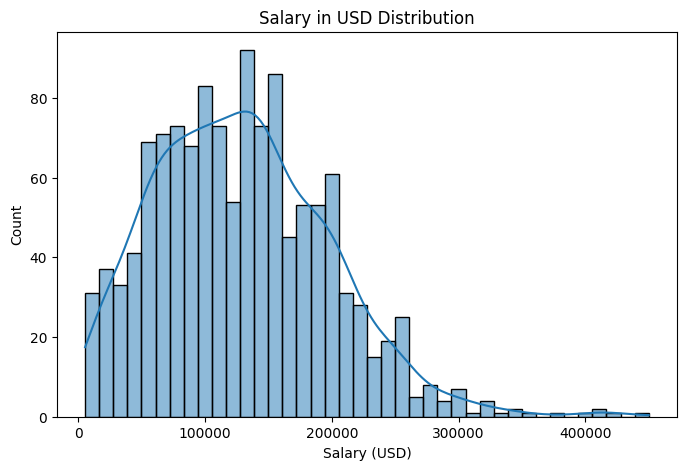

In [15]:
plt.figure(figsize=(8, 5))
sns.histplot(df["salary_in_usd"], bins=40, kde=True)
plt.title("Salary in USD Distribution")
plt.xlabel("Salary (USD)")
plt.ylabel("Count")
plt.show()

/var/folders/jh/z981c7zj0vz0gmyfc8mhdxdr0000gn/T/ipykernel_22424/2447275038.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_jobs.values, y=top_jobs.index, palette="viridis")


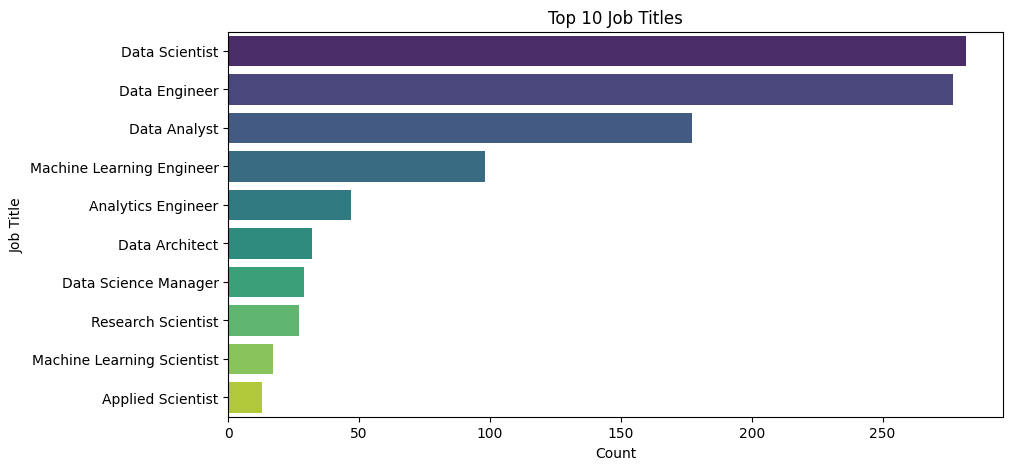

In [16]:
plt.figure(figsize=(10, 5))
top_jobs = df["job_title"].value_counts().head(10)
sns.barplot(x=top_jobs.values, y=top_jobs.index, palette="viridis")
plt.title("Top 10 Job Titles")
plt.xlabel("Count")
plt.ylabel("Job Title")
plt.show()

/var/folders/jh/z981c7zj0vz0gmyfc8mhdxdr0000gn/T/ipykernel_22424/2794597184.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="employment_type", y="salary_in_usd", palette="Set2")


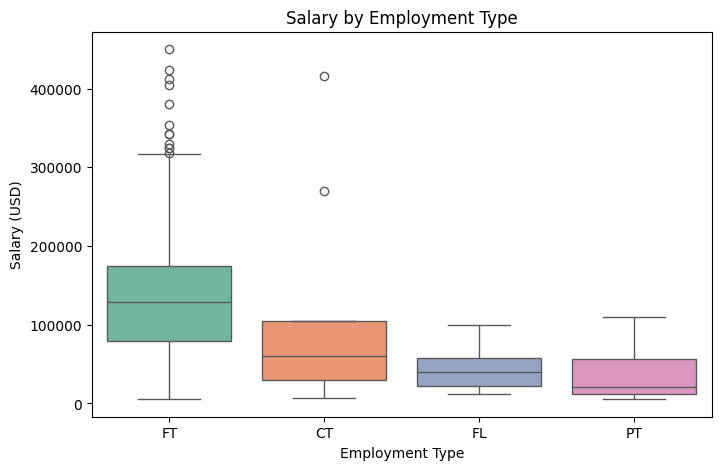

In [17]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="employment_type", y="salary_in_usd", palette="Set2")
plt.title("Salary by Employment Type")
plt.ylabel("Salary (USD)")
plt.xlabel("Employment Type")
plt.show()

/var/folders/jh/z981c7zj0vz0gmyfc8mhdxdr0000gn/T/ipykernel_22424/3979371762.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


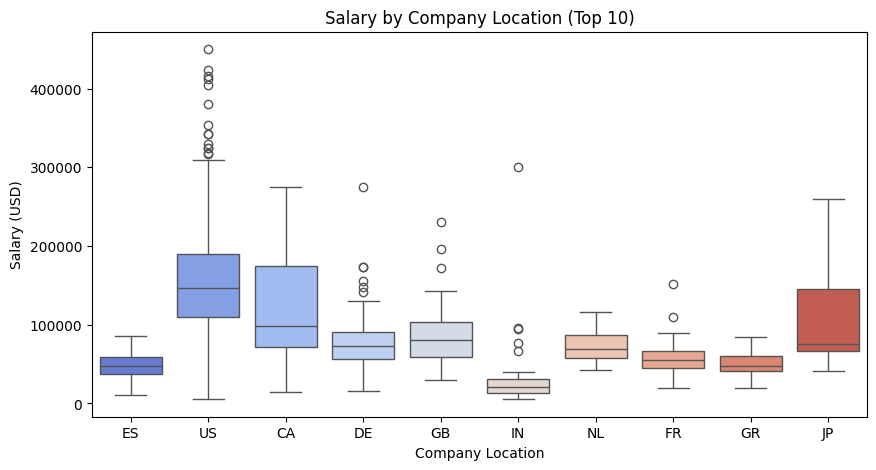

In [18]:
plt.figure(figsize=(10, 5))
top_locs = df["company_location"].value_counts().head(10).index
sns.boxplot(
    data=df[df["company_location"].isin(top_locs)],
    x="company_location",
    y="salary_in_usd",
    palette="coolwarm",
)
plt.title("Salary by Company Location (Top 10)")
plt.ylabel("Salary (USD)")
plt.xlabel("Company Location")
plt.show()

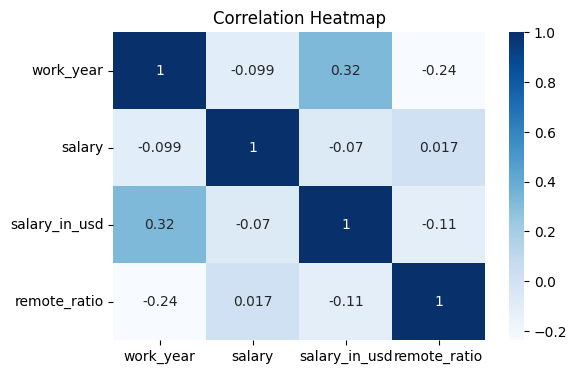

In [19]:
plt.figure(figsize=(6, 4))
corr = df.select_dtypes(include="number").corr()
sns.heatmap(corr, annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()

/var/folders/jh/z981c7zj0vz0gmyfc8mhdxdr0000gn/T/ipykernel_22424/688886431.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="experience_level", y="salary_in_usd", palette="Set3")


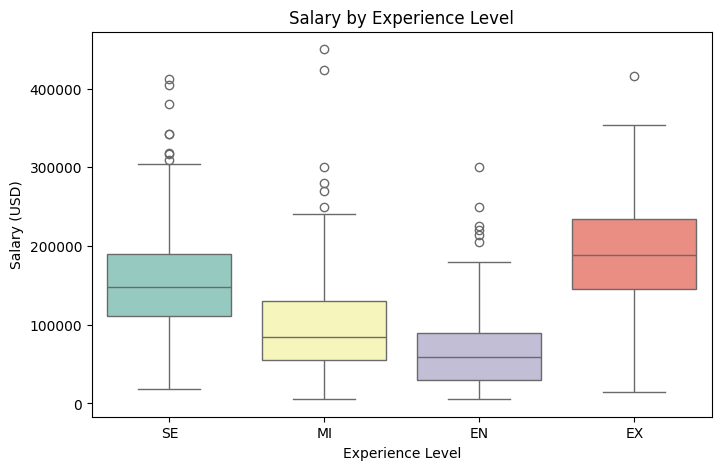

In [20]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="experience_level", y="salary_in_usd", palette="Set3")
plt.title("Salary by Experience Level")
plt.ylabel("Salary (USD)")
plt.xlabel("Experience Level")
plt.show()

/var/folders/jh/z981c7zj0vz0gmyfc8mhdxdr0000gn/T/ipykernel_22424/1270522512.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="remote_ratio", palette="coolwarm")


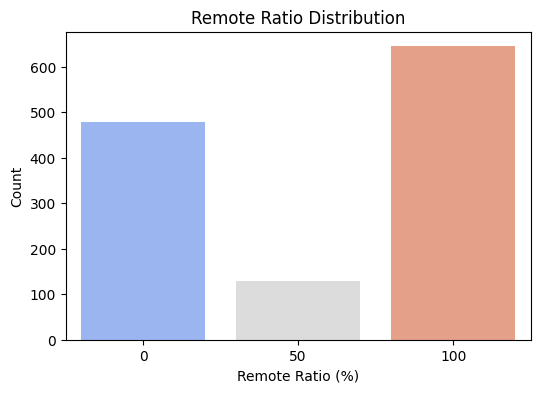

In [21]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="remote_ratio", palette="coolwarm")
plt.title("Remote Ratio Distribution")
plt.xlabel("Remote Ratio (%)")
plt.ylabel("Count")
plt.show()

/var/folders/jh/z981c7zj0vz0gmyfc8mhdxdr0000gn/T/ipykernel_22424/2184349441.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="remote_ratio", y="salary_in_usd", palette="Spectral")


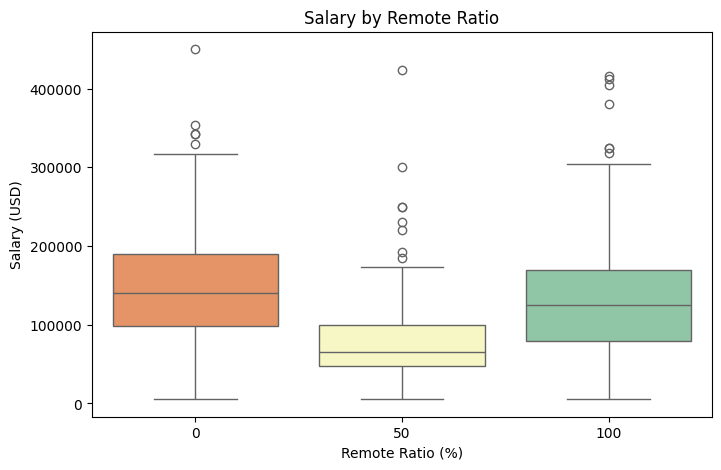

In [22]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="remote_ratio", y="salary_in_usd", palette="Spectral")
plt.title("Salary by Remote Ratio")
plt.ylabel("Salary (USD)")
plt.xlabel("Remote Ratio (%)")
plt.show()

/var/folders/jh/z981c7zj0vz0gmyfc8mhdxdr0000gn/T/ipykernel_22424/1164441718.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="company_size", y="salary_in_usd", palette="Set2")


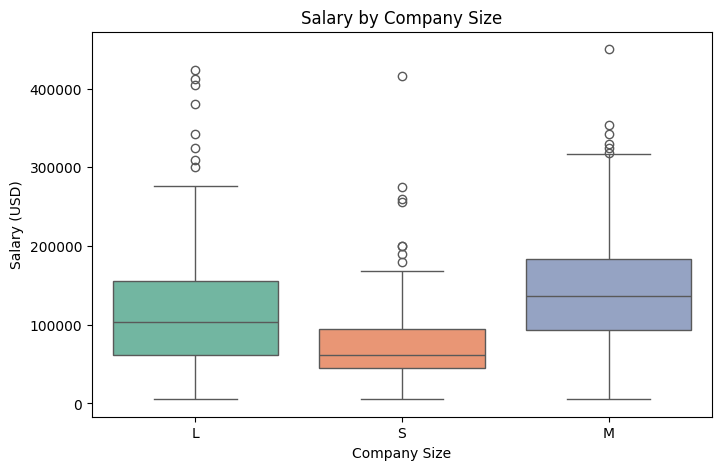

In [23]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="company_size", y="salary_in_usd", palette="Set2")
plt.title("Salary by Company Size")
plt.ylabel("Salary (USD)")
plt.xlabel("Company Size")
plt.show()

/var/folders/jh/z981c7zj0vz0gmyfc8mhdxdr0000gn/T/ipykernel_22424/4149677517.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=median_salaries.values, y=median_salaries.index, palette="mako")


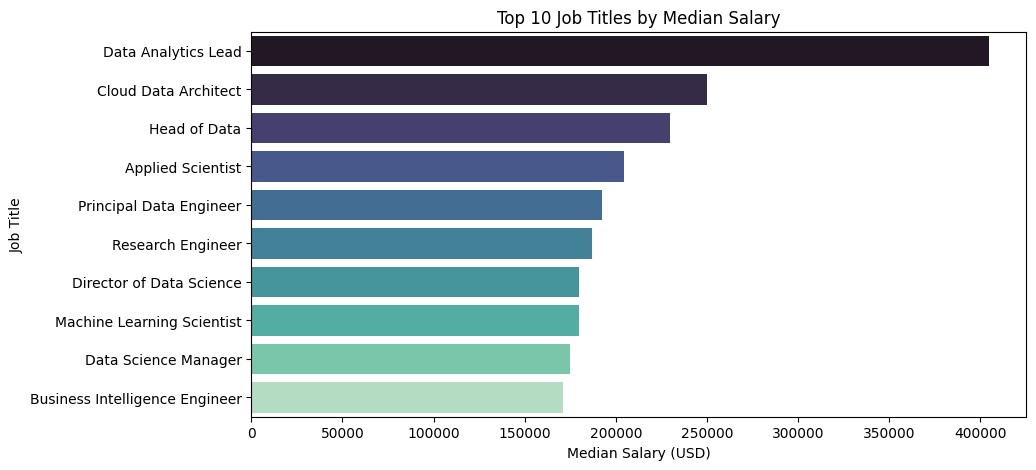

In [24]:
median_salaries = (
    df.groupby("job_title")["salary_in_usd"]
    .median()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10, 5))
sns.barplot(x=median_salaries.values, y=median_salaries.index, palette="mako")
plt.title("Top 10 Job Titles by Median Salary")
plt.xlabel("Median Salary (USD)")
plt.ylabel("Job Title")
plt.show()